## Importing liabraries and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import calendar
import warnings
import itertools
from matplotlib import pyplot
import statsmodels.api as sm

In [2]:
df = pd.read_csv("BrentOilPrices.csv")
df

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
8549,"Jan 19, 2021",55.38
8550,"Jan 20, 2021",55.66
8551,"Jan 21, 2021",55.68
8552,"Jan 22, 2021",55.22


In [3]:
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [4]:
df.tail()

,Date,Price
8549,"Jan 19, 2021",55.38
8550,"Jan 20, 2021",55.66
8551,"Jan 21, 2021",55.68
8552,"Jan 22, 2021",55.22
8553,"Jan 25, 2021",55.44


In [5]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

In [6]:
type(df["Date"])

pandas.core.series.Series

In [7]:
df.dtypes

Date      object
Price    float64
dtype: object

In [8]:
#  Need to convert Date column to standard format
df['Date'] = pd.to_datetime(df["Date"])
df

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8549,2021-01-19,55.38
8550,2021-01-20,55.66
8551,2021-01-21,55.68
8552,2021-01-22,55.22


In [9]:
df.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8554 entries, 0 to 8553
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8554 non-null   datetime64[ns]
 1   Price   8554 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 133.8 KB


In [11]:
df.describe()

,Price
count,8554.000000
mean,46.352962
std,32.165282
min,9.100000
25%,18.850000
50%,33.240000
75%,66.210000
max,143.950000


In [12]:
df.shape

(8554, 2)

In [13]:
df.columns

Index(['Date', 'Price'], dtype='object')

# Data Pre-processing and EDA

<AxesSubplot:>

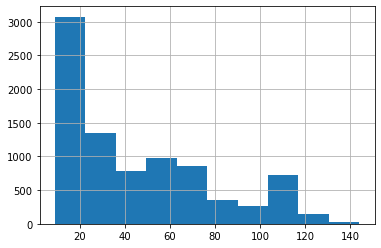

In [14]:
df['Price'].hist()

<AxesSubplot:>

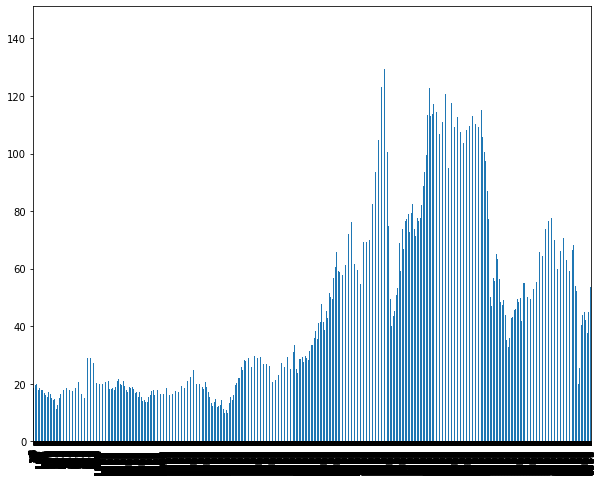

In [15]:
df['Price'].plot(kind='bar', figsize=(10,8))

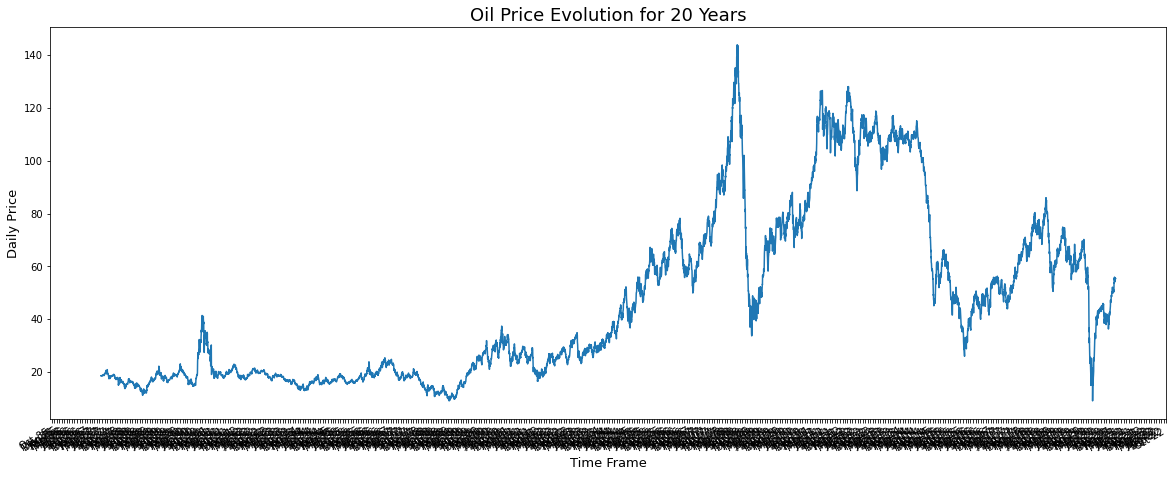

In [16]:
# build the frame
fig,ax = plt.subplots(figsize=(20,8))

date = df['Date']
price = df['Price']

#given the title, x and y axis names
plt.title("Oil Price Evolution for 20 Years", fontsize=18)
plt.xlabel("Time Frame",fontsize=13)
plt.ylabel("Daily Price", fontsize= 13) #price

#display formatting
year_month_separator = mdates.MonthLocator()
year_month_formatter = mdates.DateFormatter("%b-%y")

ax.xaxis.set_major_locator(year_month_separator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(date,price);

# auto format title the x-axis labels
fig.autofmt_xdate()

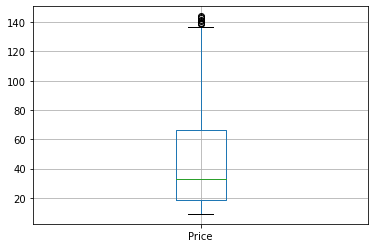

In [17]:
#boxplot showing outlier
df.boxplot(column='Price')
plt.show()

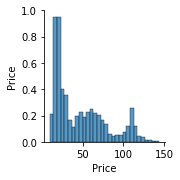

In [18]:
sns.pairplot(df)

<Figure size 1440x576 with 0 Axes>

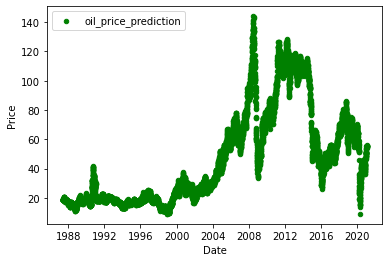

<Figure size 1440x576 with 0 Axes>

In [19]:
df.plot(kind='scatter', x='Date',y = 'Price', color='green',label='oil_price_prediction' )
plt.figure(figsize=(20,8))

## Data Preprocessing

In [20]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

In [21]:
type(df["Date"])

pandas.core.series.Series

In [22]:
df.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

## Changing the Data Type of the Date column into Date time

In [23]:
df["Date"] = pd.to_datetime(df["Date"])

In [24]:
df.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [25]:
df

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8549,2021-01-19,55.38
8550,2021-01-20,55.66
8551,2021-01-21,55.68
8552,2021-01-22,55.22


## Changing the index column to Date

In [26]:
df.set_index("Date",inplace=True)
df

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2021-01-19,55.38
2021-01-20,55.66
2021-01-21,55.68


##  Price variation graph of the crude oil 

In [27]:
import matplotlib.pyplot as plt

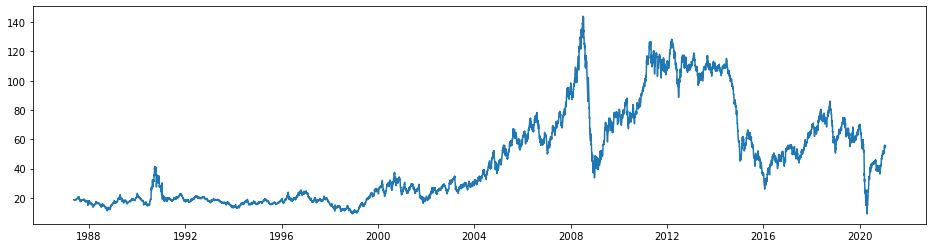

In [28]:
plt.figure(figsize=(16,4))
plt.plot(df["Price"])

<AxesSubplot:xlabel='Date'>

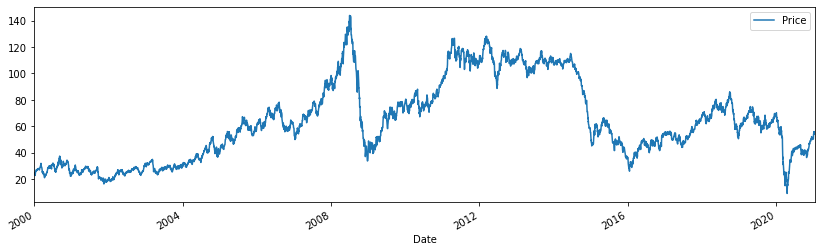

In [29]:
df.plot(xlim=['2000-01-01' , '2021-01-25'],figsize=(14,4))

## Highest Price of the crude oil

In [30]:
df["Price"].max()

143.95

## Lowest Price of the crude oil

In [31]:
df["Price"].min()

9.1

## Minimum crude oil price of each year

In [32]:
df_min = df.resample(rule='A').min()
df_min.head(10)

,Price
Date,
1987-12-31,15.03
1988-12-31,11.20
1989-12-31,16.05
1990-12-31,14.68
1991-12-31,17.60
1992-12-31,17.05
1993-12-31,13.13
1994-12-31,13.00
1995-12-31,15.35


In [33]:
df_min.tail(10)

,Price
Date,
2012-12-31,88.69
2013-12-31,96.84
2014-12-31,55.27
2015-12-31,35.26
2016-12-31,26.01
2017-12-31,43.98
2018-12-31,50.57
2019-12-31,53.23
2020-12-31,9.12


<AxesSubplot:xlabel='Date'>

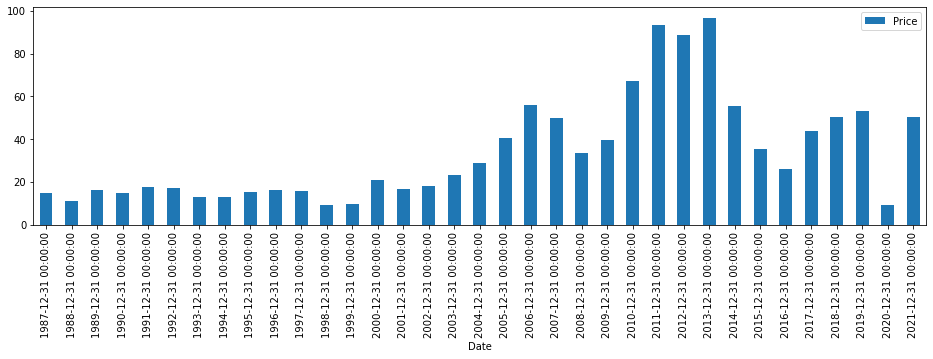

In [34]:
df_min.plot(kind = 'bar', figsize=(16,4))

## Maximum crude oil price of each year

In [35]:
df_max = df.resample(rule='A').max()
df_max.head(10)

,Price
Date,
1987-12-31,20.95
1988-12-31,17.95
1989-12-31,22.25
1990-12-31,41.45
1991-12-31,30.28
1992-12-31,21.55
1993-12-31,19.60
1994-12-31,19.03
1995-12-31,19.38


<AxesSubplot:xlabel='Date'>

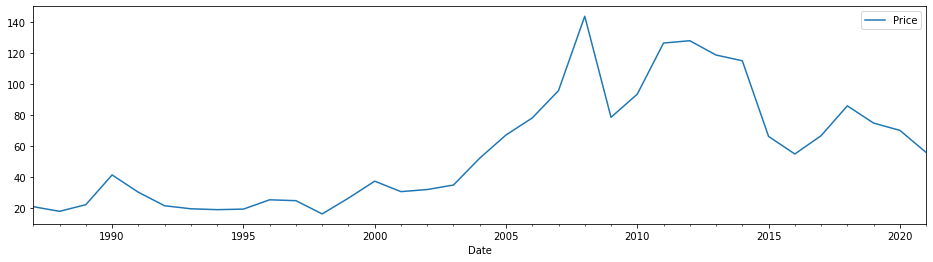

In [36]:
df_max.plot(figsize=(16,4))

## Checking the distribution of Price

In [37]:
import seaborn as sns

C:\Users\uniha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


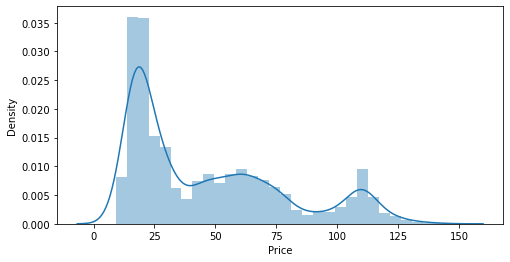

In [38]:
plt.figure(figsize=(8,4))
sns.distplot(df["Price"])
plt.show()

## ACF & PACF PLOT

C:\Users\uniha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


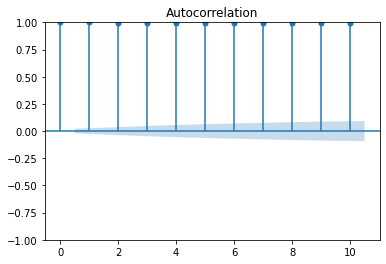

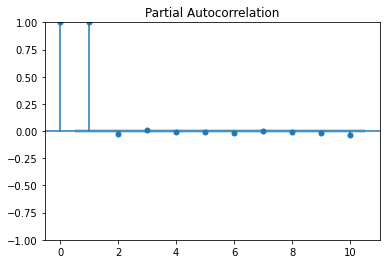

In [39]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Price,lags=10)
tsa_plots.plot_pacf(df.Price,lags=10)
plt.show()

## Plot

<AxesSubplot:xlabel='Date'>

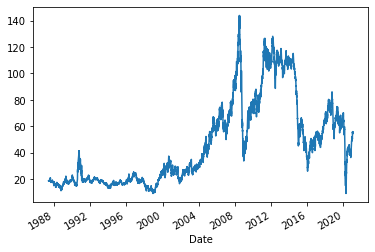

In [40]:
df.Price.plot()

## Moving Average

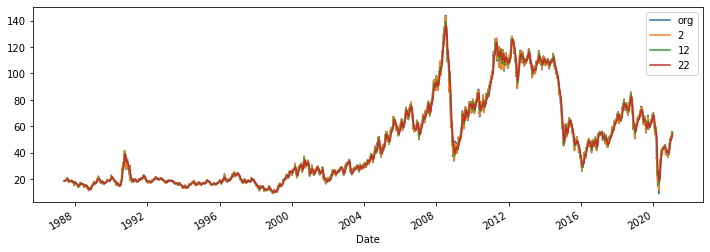

In [41]:
plt.figure(figsize=(12,4))
df.Price.plot(label="org")
for i in range(2,30,10):
    df["Price"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## Time series decomposition plot

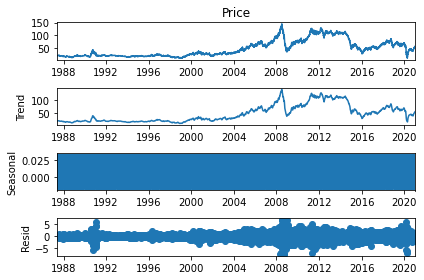

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df.Price,period=10)
decompose_ts_add.plot()
plt.show()

## Before transformation

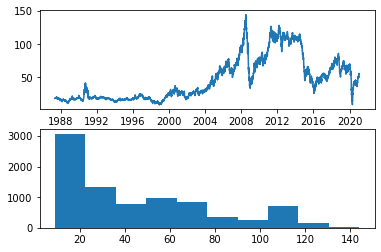

In [43]:
# Line plot
pyplot.subplot(211)
pyplot.plot(df)
# Histogram
pyplot.subplot(212)
pyplot.hist(df)
pyplot.show()

## Performing transformations on the dataset

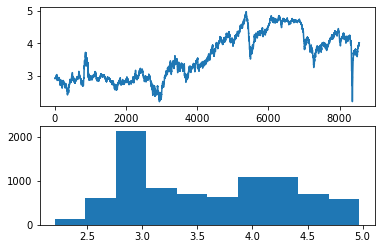

In [44]:
#Logarithmic transformation
from numpy import log
dataframe = pd.DataFrame(df.values)
dataframe.columns=['Price']
dataframe['Price']=log(dataframe['Price'])

# Line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Price'])
# Histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Price'])
pyplot.show()

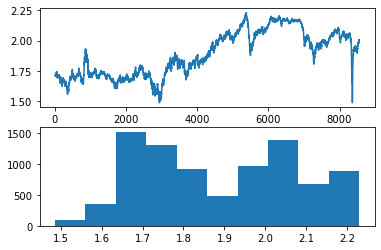

In [45]:
#Square root transformation
from numpy import sqrt
dataframe = pd.DataFrame(df.values)
dataframe.columns=['Price']
dataframe['Price']=sqrt(dataframe['Price'])

# Line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Price'])
# Histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Price'])
pyplot.show()

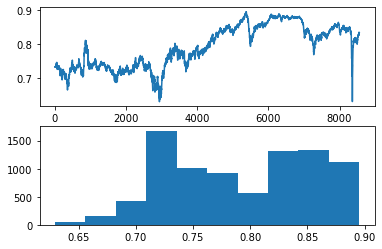

In [46]:
# Square root log transformation
dataframe = pd.DataFrame(df.values)
dataframe.columns=['Price']
dataframe['Price']=sqrt(log(dataframe['Price']))

# Line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Price'])
# Histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Price'])
pyplot.show()

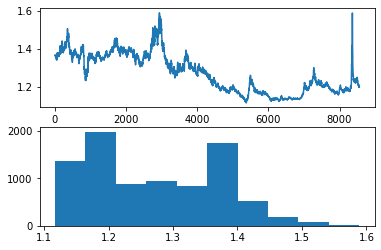

In [47]:
# Reciprocal transformation
dataframe = pd.DataFrame(df.values)
dataframe.columns=['Price']
dataframe['Price']=1/(dataframe['Price'])

# Line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Price'])
# Histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Price'])
pyplot.show()

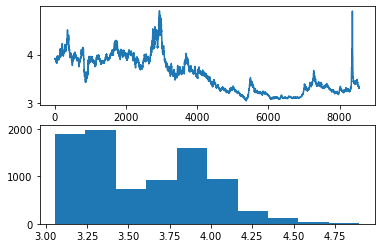

In [48]:
#Exponential transformation
import numpy
dataframe = pd.DataFrame(df.values)
dataframe.columns=['Price']
dataframe['Price']=numpy.exp(dataframe['Price'])

# Line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Price'])
# Histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Price'])
pyplot.show()

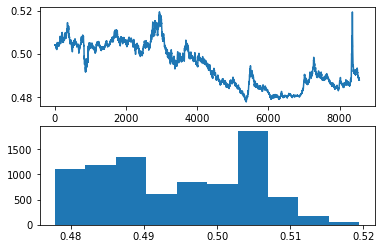

In [49]:
#Box-Cox trasformation
from scipy.stats import boxcox

#bcx_target, lam = boxcox(df["Target"])
#lam is the best lambda for the distribution

dataframe = pd.DataFrame(df.values)
dataframe.columns=['Price']
dataframe['Price'], lam =boxcox(dataframe['Price'])

# Line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Price'])
# Histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Price'])
pyplot.show()

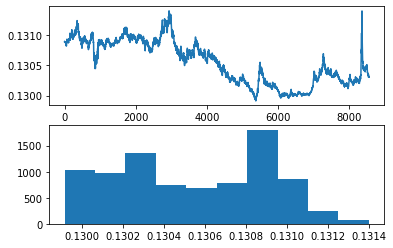

In [50]:
#Yeo-Johnson Transformation
from scipy.stats import yeojohnson
#yf_target, lam = yeojohnson(df["TARGET"])

dataframe = pd.DataFrame(df.values)
dataframe.columns=['Price']
dataframe['Price'], lam =yeojohnson(dataframe['Price'])

# Line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Price'])
# Histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Price'])
pyplot.show()

In [51]:
#from pandas import DataFrame
#from pandas import Grouper
#groups = df.groupby(Grouper(freq='%b'))
#months = DataFrame()
#for name, group in groups:
#    months[name,month] = group.values
#months.boxplot()
#pyplot.show()

## Importing changed data

In [70]:
data = pd.read_csv("BrentOilPrices1.csv")
data

,Date,Price,t,t_squared,log_price
0,20-May-87,18.63,1,1,1.270213
1,21-May-87,18.45,2,4,1.265996
2,22-May-87,18.55,3,9,1.268344
3,25-May-87,18.60,4,16,1.269513
4,26-May-87,18.63,5,25,1.270213
...,...,...,...,...,...
8549,"Jan 19, 2021",55.38,8550,73102500,1.743353
8550,"Jan 20, 2021",55.66,8551,73119601,1.745543
8551,"Jan 21, 2021",55.68,8552,73136704,1.745699
8552,"Jan 22, 2021",55.22,8553,73153809,1.742096


In [71]:
#  Need to convert Date column to standard format
data['Date'] = pd.to_datetime(data["Date"])
data

,Date,Price,t,t_squared,log_price
0,1987-05-20,18.63,1,1,1.270213
1,1987-05-21,18.45,2,4,1.265996
2,1987-05-22,18.55,3,9,1.268344
3,1987-05-25,18.60,4,16,1.269513
4,1987-05-26,18.63,5,25,1.270213
...,...,...,...,...,...
8549,2021-01-19,55.38,8550,73102500,1.743353
8550,2021-01-20,55.66,8551,73119601,1.745543
8551,2021-01-21,55.68,8552,73136704,1.745699
8552,2021-01-22,55.22,8553,73153809,1.742096


<AxesSubplot:xlabel='Date', ylabel='Price'>

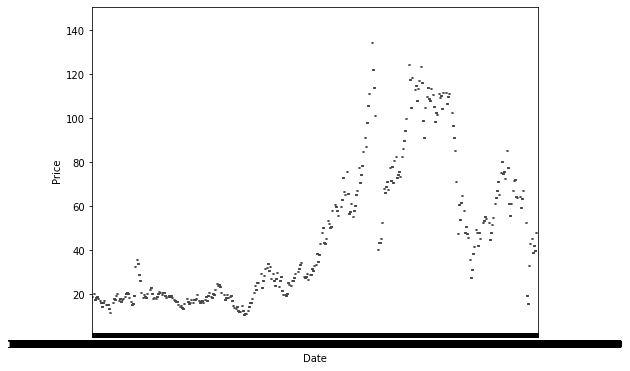

In [72]:
plt.figure(figsize=(8,6))
plt.subplot()
sns.boxplot(x="Date",y="Price",data=data)

In [73]:
#sample=df.resample('M').mean
#sample

In [74]:
# For next three diagrams
data["Date"] = pd.to_datetime(data.Date,format="%d-%b-%y")

# Extracting Day, month name, year from the Date column using 
# Date functions from pandas 

data["day"] = data.Date.dt.strftime("%d") # Day extraction
data["month"] = data.Date.dt.strftime("%b") # month extraction
data["year"] = data.Date.dt.strftime("%Y") # year extraction


<AxesSubplot:xlabel='month', ylabel='year'>

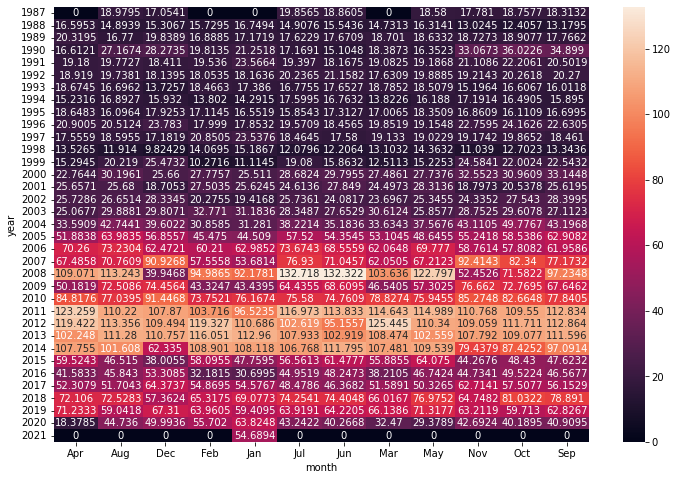

In [57]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data,values="Price",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='year', ylabel='Price'>

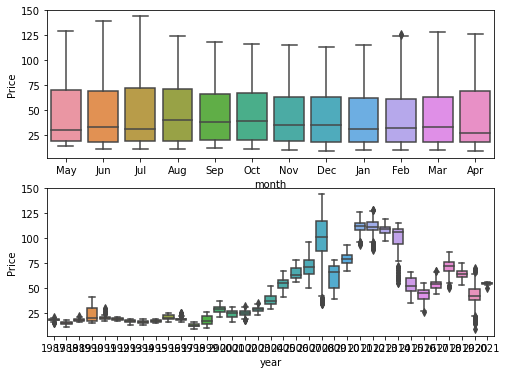

In [58]:
# Boxplot for every year
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Price",data=data)
plt.subplot(212)
sns.boxplot(x="year",y="Price",data=data)


<AxesSubplot:xlabel='year', ylabel='Price'>

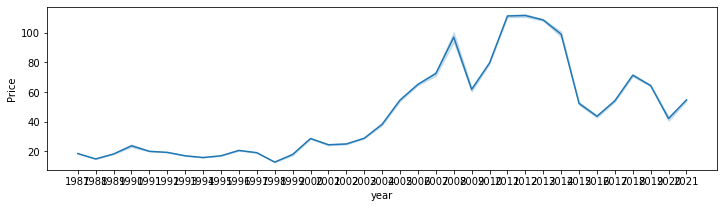

In [59]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Price",data=data)

In [60]:
#data.set_index("Date",inplace=True)
#data

## Linear models

In [75]:
#Total 8554 rows
Train = data.head(8500)
Test = data.tail(54)

In [76]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Price~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_linear))**2))
rmse_linear

36.60375516298051

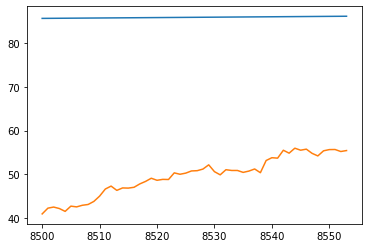

In [77]:
plt.plot(pred_linear)
plt.plot(Test["Price"])

In [78]:
#Exponential

Exp = smf.ols('log_price~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Price'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

42.56375027573273

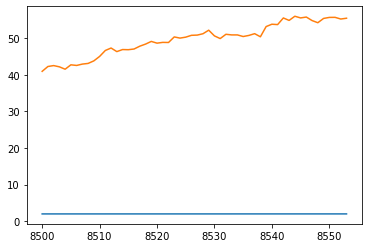

In [79]:
plt.plot(pred_Exp)
plt.plot(Test["Price"])

In [80]:
#Quadratic 

Quad = smf.ols('Price~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_Quad))**2))
rmse_Quad

27.518104101956453

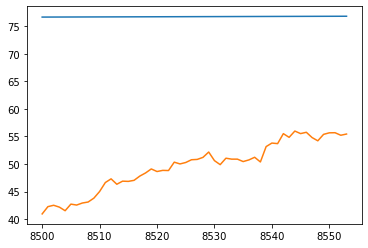

In [81]:
plt.plot(pred_Quad)
plt.plot(Test["Price"])

In [82]:
#Compare the results 

data1 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad])}
table_rmse=pd.DataFrame(data1)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_Quad,27.518104
0,rmse_linear,36.603755
1,rmse_Exp,42.563750


Predict for new time period

In [83]:
#Build the model on entire data set
model_full = smf.ols('Price~t+t_squared',data=data).fit()

In [84]:
pred_new  = pd.Series(model_full.predict(Test))
pred_new

8500    75.201789
8501    75.203987
8502    75.206183
8503    75.208377
8504    75.210570
8505    75.212761
8506    75.214950
8507    75.217138
8508    75.219324
8509    75.221509
8510    75.223692
8511    75.225873
8512    75.228053
8513    75.230231
8514    75.232407
8515    75.234582
8516    75.236755
8517    75.238926
8518    75.241096
8519    75.243264
8520    75.245431
8521    75.247596
8522    75.249759
8523    75.251921
8524    75.254081
8525    75.256239
8526    75.258396
8527    75.260551
8528    75.262705
8529    75.264856
8530    75.267007
8531    75.269155
8532    75.271302
8533    75.273447
8534    75.275591
8535    75.277733
8536    75.279874
8537    75.282012
8538    75.284149
8539    75.286285
8540    75.288419
8541    75.290551
8542    75.292682
8543    75.294811
8544    75.296938
8545    75.299064
8546    75.301188
8547    75.303310
8548    75.305431
8549    75.307550
8550    75.309668
8551    75.311784
8552    75.313898
8553    75.316010
dtype: float64

## Seasonal decompose

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

Evaluation Metric MAPE

In [86]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

Simple Exponential Method

In [87]:
ses_model = SimpleExpSmoothing(Train["Price"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Price) 

21.346357568863677

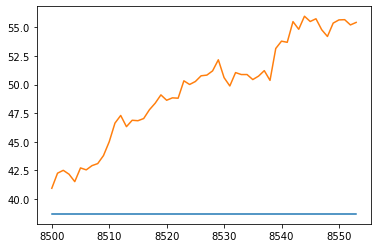

In [88]:
plt.plot(pred_ses)
plt.plot(Test["Price"])

Holt Method

In [89]:
# Holt method 
hw_model = Holt(Train["Price"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Price) 

25.64400239390483

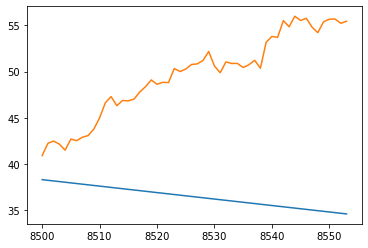

In [90]:
plt.plot(pred_hw)
plt.plot(Test["Price"])

Holts winter exponential smoothing with additive seasonality and additive trend

In [91]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Price"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Price) 

22.47393279077471

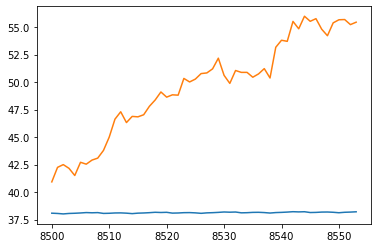

In [92]:
plt.plot(pred_hwe_add_add)
plt.plot(Test["Price"])

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [93]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Price"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Price)

22.464584007641562

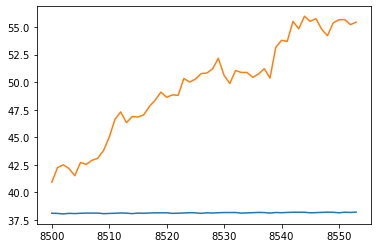

In [94]:
plt.plot(pred_hwe_mul_add)
plt.plot(Test["Price"])

In [95]:
data1 = {"MODEL1":pd.Series(["ses_model","hw_model","hwe_model_add_add","hwe_model_mul_add"]),"MAPE_Values":pd.Series([MAPE(pred_ses,Test.Price) , MAPE(pred_hw,Test.Price) ,MAPE(pred_hwe_add_add,Test.Price) , MAPE(pred_hwe_mul_add,Test.Price) ])}
table_MAPE=pd.DataFrame(data1)
table_MAPE.sort_values(['MAPE_Values'])

,MODEL1,MAPE_Values
0,ses_model,21.346358
3,hwe_model_mul_add,22.464584
2,hwe_model_add_add,22.473933
1,hw_model,25.644002


In [96]:
ses_model = SimpleExpSmoothing(df["Price"]).fit(smoothing_level=0.2)

C:\Users\uniha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [97]:
ses_model.forecast(54)

C:\Users\uniha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


8554    0.130309
8555    0.130309
8556    0.130309
8557    0.130309
8558    0.130309
8559    0.130309
8560    0.130309
8561    0.130309
8562    0.130309
8563    0.130309
8564    0.130309
8565    0.130309
8566    0.130309
8567    0.130309
8568    0.130309
8569    0.130309
8570    0.130309
8571    0.130309
8572    0.130309
8573    0.130309
8574    0.130309
8575    0.130309
8576    0.130309
8577    0.130309
8578    0.130309
8579    0.130309
8580    0.130309
8581    0.130309
8582    0.130309
8583    0.130309
8584    0.130309
8585    0.130309
8586    0.130309
8587    0.130309
8588    0.130309
8589    0.130309
8590    0.130309
8591    0.130309
8592    0.130309
8593    0.130309
8594    0.130309
8595    0.130309
8596    0.130309
8597    0.130309
8598    0.130309
8599    0.130309
8600    0.130309
8601    0.130309
8602    0.130309
8603    0.130309
8604    0.130309
8605    0.130309
8606    0.130309
8607    0.130309
dtype: float64

## Naive forecast

In [98]:
#data = pd.read_csv(r"C:\Users\hp\Downloads\BrentOilPrices.csv")
data1=pd.read_csv("BrentOilPrices.csv")
data1.set_index("Date",inplace=True)
data1

,Price
Date,
20-May-87,18.63
21-May-87,18.45
22-May-87,18.55
25-May-87,18.60
26-May-87,18.63
...,...
"Jan 19, 2021",55.38
"Jan 20, 2021",55.66
"Jan 21, 2021",55.68


In [99]:
# separate out a validation dataset
split_point = len(data1) - 30
dataset, validation = data1[0:split_point], data1[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 8524, Validation 30


Persistence/ Base model

In [100]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:]


In [101]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=104.890, Expected=105.830
>Predicted=105.830, Expected=107.390
>Predicted=107.390, Expected=107.100
>Predicted=107.100, Expected=107.340
>Predicted=107.340, Expected=107.680
>Predicted=107.680, Expected=109.100
>Predicted=109.100, Expected=109.710
>Predicted=109.710, Expected=109.790
>Predicted=109.790, Expected=109.690
>Predicted=109.690, Expected=108.540
>Predicted=108.540, Expected=108.480
>Predicted=108.480, Expected=109.790
>Predicted=109.790, Expected=109.530
>Predicted=109.530, Expected=109.120
>Predicted=109.120, Expected=109.890
>Predicted=109.890, Expected=108.630
>Predicted=108.630, Expected=108.630
>Predicted=108.630, Expected=109.480
>Predicted=109.480, Expected=109.480
>Predicted=109.480, Expected=108.300
>Predicted=108.300, Expected=108.170
>Predicted=108.170, Expected=108.190
>Predicted=108.190, Expected=108.260
>Predicted=108.260, Expected=108.370
>Predicted=108.370, Expected=108.780
>Predicted=108.780, Expected=109.870
>Predicted=109.870, Expected=109.740
>

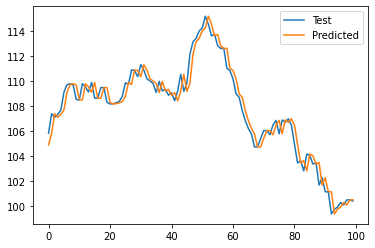

In [102]:
plt.plot(test[:100])
plt.plot(predictions[:100])
plt.legend(["Test","Predicted"])
plt.show()

In [174]:
import warnings
warnings.filterwarnings("ignore")

##  Price variation graph of the crude oil 

In [175]:
import matplotlib.pyplot as plt

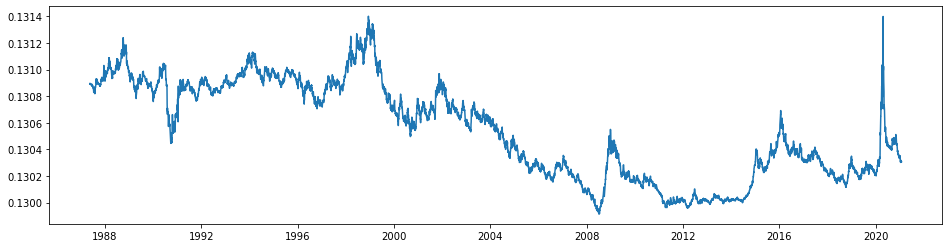

In [176]:
plt.figure(figsize=(16,4))
plt.plot(df["Price"])

<AxesSubplot:xlabel='Date'>

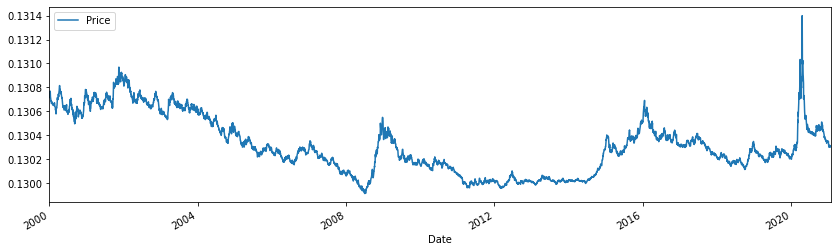

In [177]:
df.plot(xlim=['2000-01-01' , '2021-01-25'],figsize=(14,4))

## Checking the distribution of Price

In [178]:
import seaborn as sns

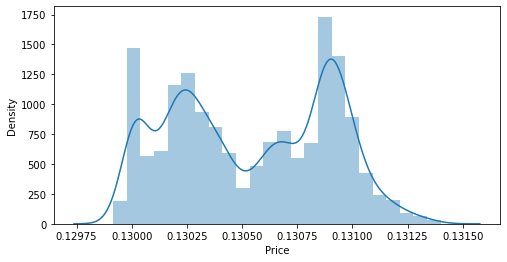

In [179]:
plt.figure(figsize=(8,4))
sns.distplot(df["Price"])
plt.show()

## Checking the stationary of Price

In [103]:
from statsmodels.tsa.stattools import adfuller

In [104]:
def adf_test(x):
    res = adfuller(x)
    print("ADF stat :",res[0])
    print("P val :" , res[1])  
    if res[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [105]:
adf_test(df['Price'])

ADF stat : -2.0003397621069103
P val : 0.2864241451982419
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### The price is non stationary as per ADFuller Test

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [107]:
additive_decomposition = seasonal_decompose(df['Price'], model='additive', period=365)

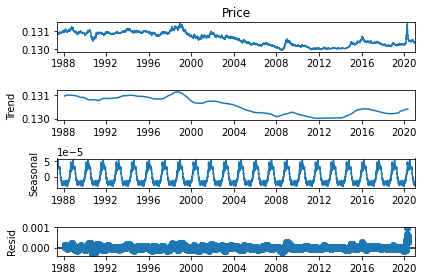

In [108]:
additive_decomposition.plot()
plt.show()


## Spliting the Data

In [109]:
train_ends = 7000

In [110]:
train = df[:7000]
test = df[7000:]
test.shape

(1554, 1)

## ACF adnd PACF

C:\Users\uniha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


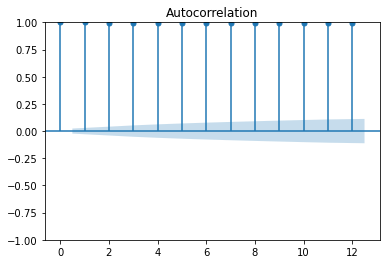

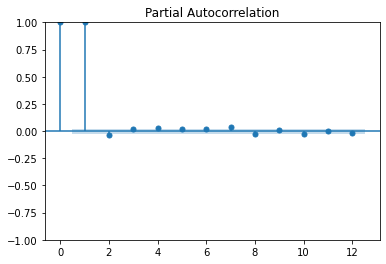

In [111]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(train,lags=12)
tsa_plots.plot_pacf(train,lags=12)
plt.show()

## Manual Method to find the PDQ 

In [112]:
import itertools

In [113]:
p = range(0,8)
q = range(0,8)
d = range(0,2)

In [114]:
pdq_combination = list(itertools.product(p,d,q))

In [115]:
len(train)

7000

In [116]:
(len(df)-1)

8553

In [117]:
8553-7000

1553

In [118]:
import warnings
warnings.filterwarnings('ignore')

In [119]:
rmse = []
order = []


In [120]:
from statsmodels. tsa. arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [121]:
i = 0
for pdq in pdq_combination:
    try:
        model = ARIMA(train,order=pdq).fit()
        pred = model.predict(start = len(train),end = (len(df)-1))
        error = np.sqrt(mean_squared_error(test,pred))
        order.append(pdq)
        rmse.append(error)
        print(i)
        i = i+1
    except:
        continue
        
        

In [122]:
pdq_val = pd.DataFrame(index=order,data = rmse,columns=["RMSE"])

In [123]:
pdq_val.min()

RMSE    NaN
dtype: object

In [124]:
pdq_val.to_csv('pdq.csv')

In [125]:
pdq_val.iloc[64]

IndexError: single positional indexer is out-of-bounds

## Arimax

In [126]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
final = ARIMA(train,order=(4,0,6)).fit()

In [127]:
predicted = final.predict(start = len(train),end = (len(df)-1))

In [128]:
predicted = pd.DataFrame(index=test.index,data = predicted.values, columns= ["PRED"])

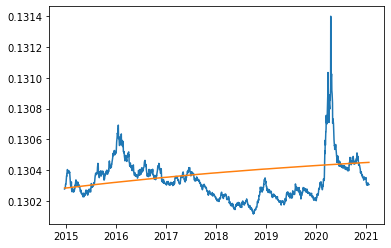

In [129]:
plt.plot(test)
plt.plot(predicted)

In [130]:
from pmdarima.arima import auto_arima

In [131]:
auto_arima(train).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7000
Model:               SARIMAX(0, 1, 1)   Log Likelihood               68895.746
Date:                Wed, 27 Jul 2022   AIC                        -137787.492
Time:                        17:56:45   BIC                        -137773.785
Sample:                             0   HQIC                       -137782.769
                               - 7000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0340   7.09e-20   4.79e+17      0.000       0.034       0.034
sigma2      1.539e-10   2.47e-11      6.223      0.000    1.05e-10    2.02e-10
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             86258.09
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.89e+24. Standard errors may be unstable.
"""

## Sarimax

In [132]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [133]:
Train_log = np.log(train["Price"])
Test_log = np.log(test["Price"])

In [134]:

model_sarimax = SARIMAX(Train_log,order = (4, 0, 6),seasonal_order=(0,0,0,12))

In [135]:
res = model_sarimax.fit()

In [136]:
pred_sarimax = res.predict(start = len(train),end = (len(df)-1))

In [137]:
import matplotlib.pyplot as plt

In [138]:
predicted_Sarima = pd.DataFrame(index=test.index,data = pred_sarimax.values, columns= ["PRED"])

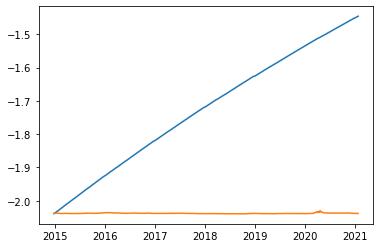

In [139]:
plt.plot(predicted_Sarima)
plt.plot(Test_log)

In [140]:
def df_x_y(df,window_size = 5):
    df_as_np = df.to_numpy()
    x = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = df_as_np[i:i+5]
        x.append(row)
        label = df_as_np[i+5]
        y.append(label)
        
    
    return np.array(x),np.array(y)

In [141]:
x,y = df_x_y(df)

In [142]:
x.shape

(8549, 5, 1)

In [143]:
y = np.reshape(y,(-1,1))

In [144]:
y = np.array(y)

In [145]:
y.shape

(8549, 1)

## Splitting the data to Train ,Test and Validation

In [146]:
x_train,y_train = x[:7000], y[:7000]
x_val,y_val = x[7000:7500], y[7000:7500]
x_test,y_test = x[7500:], y[7500:]

In [147]:
print(x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape)

(7000, 5, 1) (7000, 1) (500, 5, 1) (500, 1) (1049, 5, 1) (1049, 1)


## Creating LSTM model 

In [148]:
from tensorflow.keras.models import Sequential

In [149]:
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [150]:
model = Sequential()
model.add(InputLayer((5,1)))
model.add(LSTM(64))
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [151]:
cp = ModelCheckpoint('model/',save_best_only=True)
model.compile(optimizer=Adam(learning_rate=0.0001),loss=MeanSquaredError(),metrics=[RootMeanSquaredError()])

In [152]:
model.fit(x_train,y_train,validation_data=(x_val,y_val), epochs=65 , callbacks=[cp])

Epoch 1/65
219/219 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0559

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


219/219 [==============================] - 11s 36ms/step - loss: 0.0031 - root_mean_squared_error: 0.0559 - val_loss: 4.3295e-08 - val_root_mean_squared_error: 2.0807e-04
Epoch 2/65
218/219 [============================>.] - ETA: 0s - loss: 7.0619e-08 - root_mean_squared_error: 2.6574e-04

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


219/219 [==============================] - 7s 31ms/step - loss: 7.0738e-08 - root_mean_squared_error: 2.6597e-04 - val_loss: 3.0021e-08 - val_root_mean_squared_error: 1.7327e-04
Epoch 3/65
214/219 [============================>.] - ETA: 0s - loss: 7.0817e-08 - root_mean_squared_error: 2.6611e-04

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


219/219 [==============================] - 7s 31ms/step - loss: 7.0673e-08 - root_mean_squared_error: 2.6584e-04 - val_loss: 2.8474e-08 - val_root_mean_squared_error: 1.6874e-04
Epoch 4/65
210/219 [===========================>..] - ETA: 0s - loss: 7.0685e-08 - root_mean_squared_error: 2.6587e-04

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


219/219 [==============================] - 7s 30ms/step - loss: 7.0656e-08 - root_mean_squared_error: 2.6581e-04 - val_loss: 2.1327e-08 - val_root_mean_squared_error: 1.4604e-04
Epoch 5/65
219/219 [==============================] - 1s 6ms/step - loss: 7.0694e-08 - root_mean_squared_error: 2.6588e-04 - val_loss: 2.4534e-08 - val_root_mean_squared_error: 1.5663e-04
Epoch 6/65
219/219 [==============================] - 1s 6ms/step - loss: 7.0671e-08 - root_mean_squared_error: 2.6584e-04 - val_loss: 2.7490e-08 - val_root_mean_squared_error: 1.6580e-04
Epoch 7/65
219/219 [==============================] - 1s 6ms/step - loss: 7.0670e-08 - root_mean_squared_error: 2.6584e-04 - val_loss: 2.7998e-08 - val_root_mean_squared_error: 1.6733e-04
Epoch 8/65
219/219 [==============================] - 1s 6ms/step - loss: 7.0816e-08 - root_mean_squared_error: 2.6611e-04 - val_loss: 2.1840e-08 - val_root_mean_squared_error: 1.4778e-04
Epoch 9/65
219/219 [==============================] - 1s 6ms/step - lo

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


219/219 [==============================] - 7s 31ms/step - loss: 7.0812e-08 - root_mean_squared_error: 2.6610e-04 - val_loss: 2.0931e-08 - val_root_mean_squared_error: 1.4468e-04
Epoch 11/65
219/219 [==============================] - 1s 6ms/step - loss: 7.0773e-08 - root_mean_squared_error: 2.6603e-04 - val_loss: 2.5470e-08 - val_root_mean_squared_error: 1.5959e-04
Epoch 12/65
219/219 [==============================] - 1s 6ms/step - loss: 7.0723e-08 - root_mean_squared_error: 2.6594e-04 - val_loss: 2.4546e-08 - val_root_mean_squared_error: 1.5667e-04
Epoch 13/65
214/219 [============================>.] - ETA: 0s - loss: 7.0857e-08 - root_mean_squared_error: 2.6619e-04

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


219/219 [==============================] - 7s 31ms/step - loss: 7.0809e-08 - root_mean_squared_error: 2.6610e-04 - val_loss: 1.5294e-08 - val_root_mean_squared_error: 1.2367e-04
Epoch 14/65
219/219 [==============================] - 1s 6ms/step - loss: 7.0654e-08 - root_mean_squared_error: 2.6581e-04 - val_loss: 2.7893e-08 - val_root_mean_squared_error: 1.6701e-04
Epoch 15/65
219/219 [==============================] - 1s 6ms/step - loss: 7.0973e-08 - root_mean_squared_error: 2.6641e-04 - val_loss: 1.8562e-08 - val_root_mean_squared_error: 1.3624e-04
Epoch 16/65
219/219 [==============================] - 1s 6ms/step - loss: 7.0960e-08 - root_mean_squared_error: 2.6638e-04 - val_loss: 1.8554e-08 - val_root_mean_squared_error: 1.3621e-04
Epoch 17/65
219/219 [==============================] - 1s 6ms/step - loss: 7.1195e-08 - root_mean_squared_error: 2.6682e-04 - val_loss: 1.7247e-08 - val_root_mean_squared_error: 1.3133e-04
Epoch 18/65
219/219 [==============================] - 1s 6ms/step

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


219/219 [==============================] - 7s 31ms/step - loss: 7.0969e-08 - root_mean_squared_error: 2.6640e-04 - val_loss: 1.4210e-08 - val_root_mean_squared_error: 1.1921e-04
Epoch 22/65
219/219 [==============================] - 1s 6ms/step - loss: 7.1744e-08 - root_mean_squared_error: 2.6785e-04 - val_loss: 4.7206e-08 - val_root_mean_squared_error: 2.1727e-04
Epoch 23/65
219/219 [==============================] - 1s 6ms/step - loss: 7.1011e-08 - root_mean_squared_error: 2.6648e-04 - val_loss: 2.7043e-08 - val_root_mean_squared_error: 1.6445e-04
Epoch 24/65
213/219 [============================>.] - ETA: 0s - loss: 7.2785e-08 - root_mean_squared_error: 2.6979e-04

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


219/219 [==============================] - 7s 31ms/step - loss: 7.2991e-08 - root_mean_squared_error: 2.7017e-04 - val_loss: 9.2948e-09 - val_root_mean_squared_error: 9.6409e-05
Epoch 25/65
219/219 [==============================] - 1s 7ms/step - loss: 7.1696e-08 - root_mean_squared_error: 2.6776e-04 - val_loss: 3.0758e-08 - val_root_mean_squared_error: 1.7538e-04
Epoch 26/65
217/219 [============================>.] - ETA: 0s - loss: 7.1223e-08 - root_mean_squared_error: 2.6688e-04

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


219/219 [==============================] - 7s 31ms/step - loss: 7.1253e-08 - root_mean_squared_error: 2.6693e-04 - val_loss: 8.9762e-09 - val_root_mean_squared_error: 9.4743e-05
Epoch 27/65
219/219 [==============================] - 1s 6ms/step - loss: 7.1951e-08 - root_mean_squared_error: 2.6824e-04 - val_loss: 3.0400e-08 - val_root_mean_squared_error: 1.7436e-04
Epoch 28/65
219/219 [==============================] - 1s 6ms/step - loss: 7.2388e-08 - root_mean_squared_error: 2.6905e-04 - val_loss: 5.3247e-08 - val_root_mean_squared_error: 2.3075e-04
Epoch 29/65
219/219 [==============================] - 1s 6ms/step - loss: 7.2434e-08 - root_mean_squared_error: 2.6914e-04 - val_loss: 1.7833e-08 - val_root_mean_squared_error: 1.3354e-04
Epoch 30/65
219/219 [==============================] - 1s 6ms/step - loss: 7.1835e-08 - root_mean_squared_error: 2.6802e-04 - val_loss: 1.6602e-08 - val_root_mean_squared_error: 1.2885e-04
Epoch 31/65
219/219 [==============================] - 1s 6ms/step

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


219/219 [==============================] - 7s 32ms/step - loss: 7.5507e-08 - root_mean_squared_error: 2.7479e-04 - val_loss: 4.1677e-09 - val_root_mean_squared_error: 6.4558e-05
Epoch 43/65
219/219 [==============================] - 1s 6ms/step - loss: 8.3656e-08 - root_mean_squared_error: 2.8923e-04 - val_loss: 6.0037e-09 - val_root_mean_squared_error: 7.7483e-05
Epoch 44/65
219/219 [==============================] - 1s 6ms/step - loss: 7.7961e-08 - root_mean_squared_error: 2.7922e-04 - val_loss: 2.0713e-08 - val_root_mean_squared_error: 1.4392e-04
Epoch 45/65
219/219 [==============================] - 1s 6ms/step - loss: 7.4056e-08 - root_mean_squared_error: 2.7213e-04 - val_loss: 1.7551e-08 - val_root_mean_squared_error: 1.3248e-04
Epoch 46/65
219/219 [==============================] - 1s 6ms/step - loss: 7.4897e-08 - root_mean_squared_error: 2.7367e-04 - val_loss: 7.9365e-08 - val_root_mean_squared_error: 2.8172e-04
Epoch 47/65
219/219 [==============================] - 1s 6ms/step

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


219/219 [==============================] - 7s 31ms/step - loss: 7.7148e-08 - root_mean_squared_error: 2.7775e-04 - val_loss: 4.0220e-09 - val_root_mean_squared_error: 6.3419e-05
Epoch 51/65
219/219 [==============================] - 1s 6ms/step - loss: 8.0749e-08 - root_mean_squared_error: 2.8416e-04 - val_loss: 5.7787e-09 - val_root_mean_squared_error: 7.6018e-05
Epoch 52/65
219/219 [==============================] - 1s 6ms/step - loss: 8.2321e-08 - root_mean_squared_error: 2.8692e-04 - val_loss: 4.1628e-08 - val_root_mean_squared_error: 2.0403e-04
Epoch 53/65
219/219 [==============================] - 1s 6ms/step - loss: 7.9258e-08 - root_mean_squared_error: 2.8153e-04 - val_loss: 9.5997e-08 - val_root_mean_squared_error: 3.0983e-04
Epoch 54/65
219/219 [==============================] - 1s 6ms/step - loss: 7.9944e-08 - root_mean_squared_error: 2.8274e-04 - val_loss: 1.5379e-07 - val_root_mean_squared_error: 3.9216e-04
Epoch 55/65
219/219 [==============================] - 1s 6ms/step

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


219/219 [==============================] - 7s 30ms/step - loss: 8.3737e-08 - root_mean_squared_error: 2.8937e-04 - val_loss: 3.9558e-09 - val_root_mean_squared_error: 6.2895e-05
Epoch 58/65
219/219 [==============================] - 1s 6ms/step - loss: 8.3939e-08 - root_mean_squared_error: 2.8972e-04 - val_loss: 5.7622e-08 - val_root_mean_squared_error: 2.4005e-04
Epoch 59/65
219/219 [==============================] - 1s 6ms/step - loss: 8.0431e-08 - root_mean_squared_error: 2.8360e-04 - val_loss: 5.1663e-08 - val_root_mean_squared_error: 2.2729e-04
Epoch 60/65
219/219 [==============================] - 1s 6ms/step - loss: 7.1973e-08 - root_mean_squared_error: 2.6828e-04 - val_loss: 3.7472e-08 - val_root_mean_squared_error: 1.9358e-04
Epoch 61/65
219/219 [==============================] - 1s 6ms/step - loss: 7.2173e-08 - root_mean_squared_error: 2.6865e-04 - val_loss: 5.1018e-09 - val_root_mean_squared_error: 7.1427e-05
Epoch 62/65
219/219 [==============================] - 1s 6ms/step

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


219/219 [==============================] - 7s 31ms/step - loss: 7.2089e-08 - root_mean_squared_error: 2.6849e-04 - val_loss: 3.7693e-09 - val_root_mean_squared_error: 6.1395e-05
Epoch 64/65
219/219 [==============================] - 1s 6ms/step - loss: 7.4162e-08 - root_mean_squared_error: 2.7233e-04 - val_loss: 2.3163e-08 - val_root_mean_squared_error: 1.5219e-04
Epoch 65/65
219/219 [==============================] - 1s 6ms/step - loss: 6.8799e-08 - root_mean_squared_error: 2.6230e-04 - val_loss: 4.1014e-09 - val_root_mean_squared_error: 6.4042e-05


In [153]:
from tensorflow.keras.models import load_model

In [154]:
model = load_model('model/')

In [155]:
tp = model.predict(x_train).flatten()

In [156]:
train_p = pd.DataFrame({'actual' : y_train.flatten() , 'predicted' : tp})

In [157]:
train_p

,actual,predicted
0,0.130892,0.130555
1,0.130892,0.130555
2,0.130893,0.130554
3,0.130890,0.130554
4,0.130889,0.130554
...,...,...
6995,0.130278,0.130337
6996,0.130281,0.130338
6997,0.130281,0.130339
6998,0.130287,0.130339


In [158]:
import matplotlib.pyplot as plt

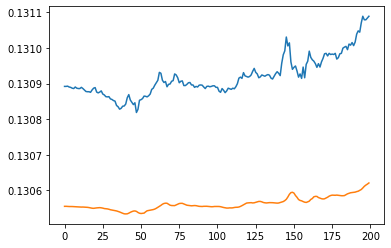

In [159]:
plt.plot(train_p['actual'][:200])
plt.plot(train_p['predicted'][:200])


In [160]:
vp = model.predict(x_val).flatten()

In [161]:
val_p = pd.DataFrame({'actual' : y_val.flatten() , 'predicted' : vp})

In [162]:
train_p

,actual,predicted
0,0.130892,0.130555
1,0.130892,0.130555
2,0.130893,0.130554
3,0.130890,0.130554
4,0.130889,0.130554
...,...,...
6995,0.130278,0.130337
6996,0.130281,0.130338
6997,0.130281,0.130339
6998,0.130287,0.130339


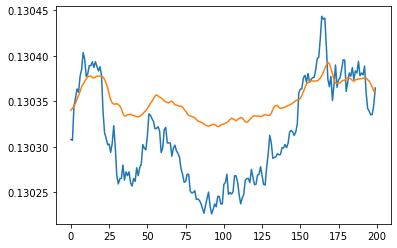

In [163]:
plt.plot(val_p['actual'][:200])
plt.plot(val_p['predicted'][:200])

In [164]:
tp = model.predict(x_test).flatten()

In [165]:
test_p = pd.DataFrame({'actual' : y_test.flatten() , 'predicted' : tp})

In [166]:
test_p


,actual,predicted
0,0.130326,0.130358
1,0.130339,0.130357
2,0.130318,0.130356
3,0.130323,0.130355
4,0.130314,0.130355
...,...,...
1044,0.130307,0.130348
1045,0.130305,0.130349
1046,0.130305,0.130349
1047,0.130309,0.130350


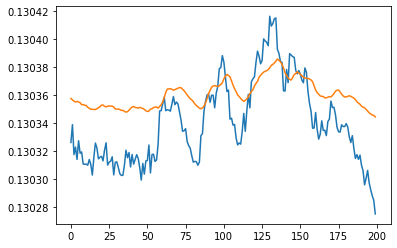

In [167]:
plt.plot(test_p['actual'][:200])
plt.plot(test_p['predicted'][:200])

## Creating FB Prophet Model

In [168]:
df_prophet = pd.read_csv("BrentOilPrices.csv")

In [169]:
df_prophet

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
8549,"Jan 19, 2021",55.38
8550,"Jan 20, 2021",55.66
8551,"Jan 21, 2021",55.68
8552,"Jan 22, 2021",55.22


In [170]:
df_prophet["Date"] = pd.to_datetime(df_prophet['Date'])

In [171]:
df_prophet.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [172]:
df_prophet.columns = ["ds" , "y"]

In [181]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [167]:
train = df_prophet.iloc[:len(df_prophet)-500]
test = df_prophet.iloc[len(df_prophet)-500:]

In [10]:
train.shape

(8054, 2)

In [11]:
test.shape

(500, 2)

In [18]:
m = Prophet(interval_width=0.95 , daily_seasonality=True)
m.fit(train)
predict = m.make_future_dataframe(periods=500,freq="D")
forcast = m.predict(predict)

In [19]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1987-05-20,17.790545,-4.978684,39.533961,17.790545,17.790545,-0.655924,-0.655924,-0.655924,-1.56255,...,-0.147584,-0.147584,-0.147584,1.054211,1.054211,1.054211,0.0,0.0,0.0,17.134621
1,1987-05-21,17.793896,-6.055431,40.358538,17.793896,17.793896,-0.446051,-0.446051,-0.446051,-1.56255,...,0.037323,0.037323,0.037323,1.079176,1.079176,1.079176,0.0,0.0,0.0,17.347846
2,1987-05-22,17.797248,-5.208215,39.522828,17.797248,17.797248,-0.527195,-0.527195,-0.527195,-1.56255,...,-0.067862,-0.067862,-0.067862,1.103218,1.103218,1.103218,0.0,0.0,0.0,17.270053
3,1987-05-25,17.807301,-5.809536,40.951649,17.807301,17.807301,-0.448224,-0.448224,-0.448224,-1.56255,...,-0.050872,-0.050872,-0.050872,1.165198,1.165198,1.165198,0.0,0.0,0.0,17.359077
4,1987-05-26,17.810652,-5.664216,40.231234,17.810652,17.810652,-0.543116,-0.543116,-0.543116,-1.56255,...,-0.161642,-0.161642,-0.161642,1.181076,1.181076,1.181076,0.0,0.0,0.0,17.267536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8549,2020-06-22,31.377307,4.900032,58.391212,18.694116,44.665680,-0.771436,-0.771436,-0.771436,-1.56255,...,-0.050872,-0.050872,-0.050872,0.841986,0.841986,0.841986,0.0,0.0,0.0,30.605871
8550,2020-06-23,31.351188,3.579939,56.084871,18.627452,44.682943,-0.872401,-0.872401,-0.872401,-1.56255,...,-0.161642,-0.161642,-0.161642,0.851792,0.851792,0.851792,0.0,0.0,0.0,30.478787
8551,2020-06-24,31.325068,3.265142,56.168382,18.560788,44.700486,-0.844183,-0.844183,-0.844183,-1.56255,...,-0.147584,-0.147584,-0.147584,0.865951,0.865951,0.865951,0.0,0.0,0.0,30.480885
8552,2020-06-25,31.298949,5.273375,56.474653,18.494125,44.718029,-0.640864,-0.640864,-0.640864,-1.56255,...,0.037323,0.037323,0.037323,0.884363,0.884363,0.884363,0.0,0.0,0.0,30.658085


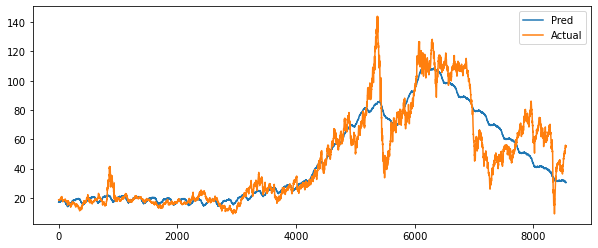

In [25]:
plt.figure(figsize=(10,4))
plt.plot(forcast["yhat"])
plt.plot(df_prophet["y"])
plt.legend(["Pred","Actual"])
plt.show()